In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('house_price_data.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
x = dataset[:,0:10]

In [7]:
x

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [8]:
y = dataset[:,10]

In [9]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()

In [12]:
x_scale = min_max_scaler.fit_transform(x)

/Users/raphaelfontes/Desktop/virtualenv/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3)

In [16]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [17]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [18]:
from keras.models import Sequential

Using TensorFlow backend.


In [19]:
from keras.layers import Dense

In [20]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 396us/step - loss: 0.6956 - acc: 0.4491 - val_loss: 0.6919 - val_acc: 0.4977
Epoch 2/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.6877 - acc: 0.5607 - val_loss: 0.6858 - val_acc: 0.5753
Epoch 3/100
1022/1022 [==============================] - 0s 89us/step - loss: 0.6820 - acc: 0.5939 - val_loss: 0.6808 - val_acc: 0.5799
Epoch 4/100
1022/1022 [==============================] - 0s 69us/step - loss: 0.6769 - acc: 0.6027 - val_loss: 0.6760 - val_acc: 0.5845
Epoch 5/100
1022/1022 [==============================] - 0s 87us/step - loss: 0.6723 - acc: 0.5939 - val_loss: 0.6715 - val_acc: 0.6073
Epoch 6/100
1022/1022 [==============================] - 0s 86us/step - loss: 0.6681 - acc: 0.6155 - val_loss: 0.6673 - val_acc: 0.6347
Epoch 7/100
1022/1022 [==============================] - 0s 83us/step - loss: 0.6639 - a

1022/1022 [==============================] - 0s 66us/step - loss: 0.3278 - acc: 0.8748 - val_loss: 0.3197 - val_acc: 0.8858
Epoch 59/100
1022/1022 [==============================] - 0s 69us/step - loss: 0.3250 - acc: 0.8757 - val_loss: 0.3168 - val_acc: 0.8858
Epoch 60/100
1022/1022 [==============================] - 0s 69us/step - loss: 0.3223 - acc: 0.8787 - val_loss: 0.3142 - val_acc: 0.8858
Epoch 61/100
1022/1022 [==============================] - 0s 68us/step - loss: 0.3193 - acc: 0.8757 - val_loss: 0.3119 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.3168 - acc: 0.8796 - val_loss: 0.3088 - val_acc: 0.8858
Epoch 63/100
1022/1022 [==============================] - 0s 69us/step - loss: 0.3132 - acc: 0.8777 - val_loss: 0.3066 - val_acc: 0.8950
Epoch 64/100
1022/1022 [==============================] - 0s 62us/step - loss: 0.3123 - acc: 0.8748 - val_loss: 0.3040 - val_acc: 0.8995
Epoch 65/100
1022/1022 [==============================

In [23]:
model.evaluate(x_test, y_test)[1]

219/219 [==============================] - 0s 38us/step


0.8721461168162898

In [24]:
import matplotlib.pyplot as plt

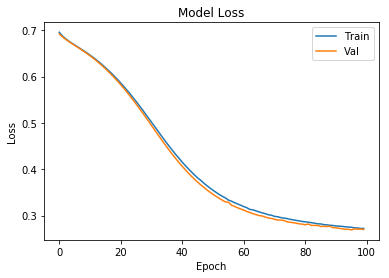

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

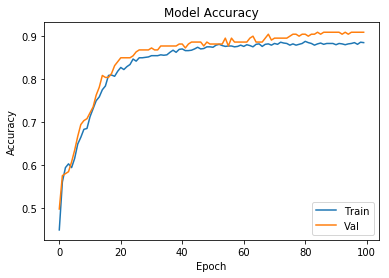

In [26]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [30]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
hist_2 = model_2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4685 - acc: 0.7935 - val_loss: 0.3845 - val_acc: 0.8402
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3369 - acc: 0.8708 - val_loss: 0.3478 - val_acc: 0.8447
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3231 - acc: 0.8591 - val_loss: 0.3401 - val_acc: 0.8630
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3014 - acc: 0.8787 - val_loss: 0.3167 - val_acc: 0.8630
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2835 - acc: 0.8885 - val_loss: 0.2814 - val_acc: 0.8995
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2521 - acc: 0.8924 - val_loss: 0.2632 - val_acc: 0.8904
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2473 - acc: 0.8933 - val_loss: 0.2788 - val_acc: 0.8950
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1477 - acc: 0.9364 - val_loss: 0.2273 - val_acc: 0.9315
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1665 - acc: 0.9198 - val_loss: 0.2506 - val_acc: 0.9087
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1437 - acc: 0.9423 - val_loss: 0.2525 - val_acc: 0.9224
Epoch 64/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1258 - acc: 0.9491 - val_loss: 0.3214 - val_acc: 0.9224
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1377 - acc: 0.9374 - val_loss: 0.3458 - val_acc: 0.8995
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1397 - acc: 0.9413 - val_loss: 0.2716 - val_acc: 0.9178
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1311 - acc: 0.9403 - val_loss: 0.3131 - val_acc: 0.8995
Epoch 68/100
1022/1022 [========================

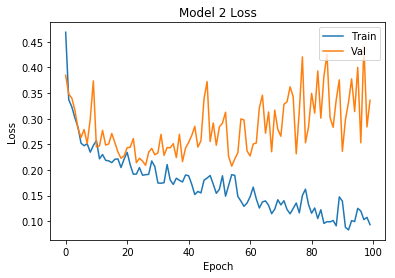

In [32]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

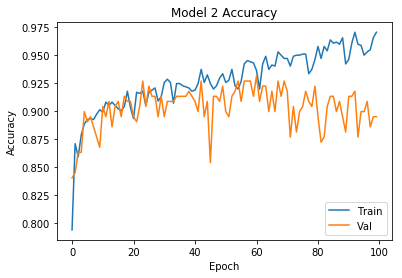

In [35]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
from keras.layers import Dropout

In [37]:
from keras import regularizers

In [40]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
hist_3 = model_3.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.7778 - acc: 0.6194 - val_loss: 4.0943 - val_acc: 0.7306
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7449 - acc: 0.8170 - val_loss: 0.6619 - val_acc: 0.8721
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5886 - acc: 0.8513 - val_loss: 0.5212 - val_acc: 0.8767
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4958 - acc: 0.8836 - val_loss: 0.4724 - val_acc: 0.9041
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5214 - acc: 0.8571 - val_loss: 0.4661 - val_acc: 0.9178
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4908 - acc: 0.8836 - val_loss: 0.4497 - val_acc: 0.9041
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4940 - acc: 0.8748 - val_loss: 0.4544 - val_acc: 0.9087
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4354 - acc: 0.8826 - val_loss: 0.3989 - val_acc: 0.9132
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4363 - acc: 0.8738 - val_loss: 0.4037 - val_acc: 0.9178
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4376 - acc: 0.8845 - val_loss: 0.4097 - val_acc: 0.9132
Epoch 64/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4270 - acc: 0.8816 - val_loss: 0.4537 - val_acc: 0.8767
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4243 - acc: 0.8914 - val_loss: 0.4037 - val_acc: 0.8995
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4274 - acc: 0.8894 - val_loss: 0.4044 - val_acc: 0.9087
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4372 - acc: 0.8679 - val_loss: 0.4234 - val_acc: 0.9041
Epoch 68/100
1022/1022 [========================

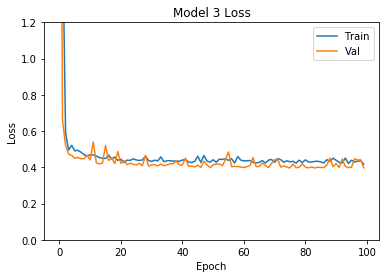

In [44]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

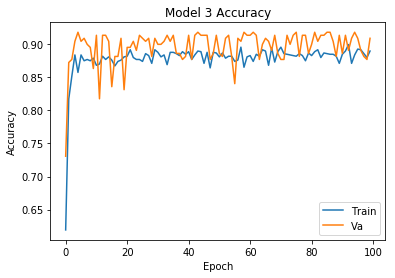

In [46]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Va'], loc='lower right')
plt.show()